# Download dataset

In [17]:
import numpy as np
import pandas as pd
import random

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
!pip install -q kaggle

In [21]:
# download api token from: https://www.kaggle.com/settings -> and upload here:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"danielhugauf","key":"0295a67482876b6105c9689eaf93ab20"}'}

In [22]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
!cp kaggle.json ~/.kaggle/

In [24]:
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
# !kaggle competitions download -c optiver-trading-at-the-close

In [26]:
!kaggle datasets download -d nguyentuannguyen/optiver-trading-at-the-close

optiver-trading-at-the-close.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!unzip optiver-trading-at-the-close.zip

Archive:  optiver-trading-at-the-close.zip
  inflating: optiver-trading-at-the-close/.idea/.gitignore  
  inflating: optiver-trading-at-the-close/.idea/inspectionProfiles/profiles_settings.xml  
  inflating: optiver-trading-at-the-close/.idea/jupyter-settings.xml  
  inflating: optiver-trading-at-the-close/.idea/misc.xml  
  inflating: optiver-trading-at-the-close/.idea/modules.xml  
  inflating: optiver-trading-at-the-close/.idea/optiver-trading-at-the-close.iml  
  inflating: optiver-trading-at-the-close/.idea/workspace.xml  
  inflating: optiver-trading-at-the-close/example_test_files/revealed_targets.csv  
  inflating: optiver-trading-at-the-close/example_test_files/sample_submission.csv  
  inflating: optiver-trading-at-the-close/example_test_files/test.csv  
  inflating: optiver-trading-at-the-close/optiver2023/__init__.py  
  inflating: optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: optiver-trading-at-the-close/optiver_stock_t

In [28]:
train_dataset = pd.read_csv('/content/optiver-trading-at-the-close/train.csv')
train_dataset.shape

(5237980, 17)

In [29]:
train_dataset.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Explore the dataset

In [30]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


### Missing data

In [31]:
train_dataset.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

Examine these columns
- far price
- near price

In [32]:
train_dataset[['far_price', 'near_price']].describe()

,far_price,near_price
count,2.343638e+06,2.380800e+06
mean,1.001713e+00,9.996601e-01
std,7.214705e-01,1.216920e-02
min,7.700000e-05,7.869880e-01
25%,9.963320e-01,9.971000e-01
50%,9.998830e-01,9.998890e-01
75%,1.003318e+00,1.002590e+00
max,4.379531e+02,1.309732e+00


<Axes: xlabel='near_price', ylabel='Density'>

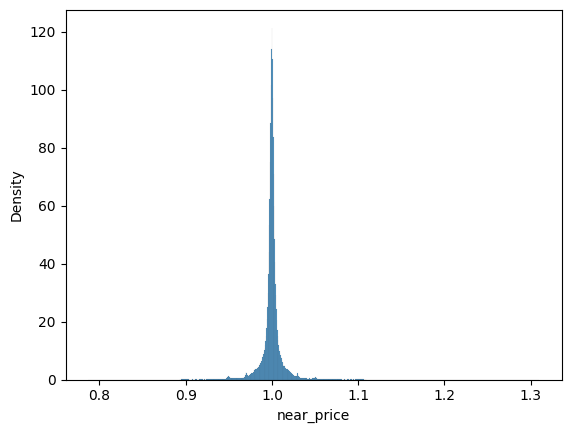

In [33]:
sns.histplot(x=train_dataset.near_price, stat='density', bins=1000)

<Axes: xlabel='far_price', ylabel='Density'>

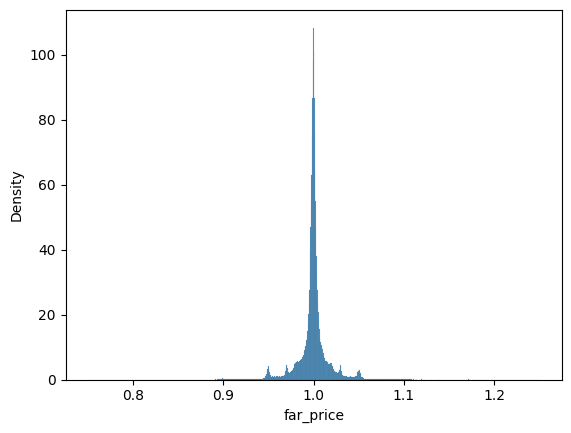

In [34]:
sns.histplot(x=train_dataset[(train_dataset.far_price > 0.75) & (train_dataset.far_price < 1.25)].far_price, stat='density', bins=1000)

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='Density'>

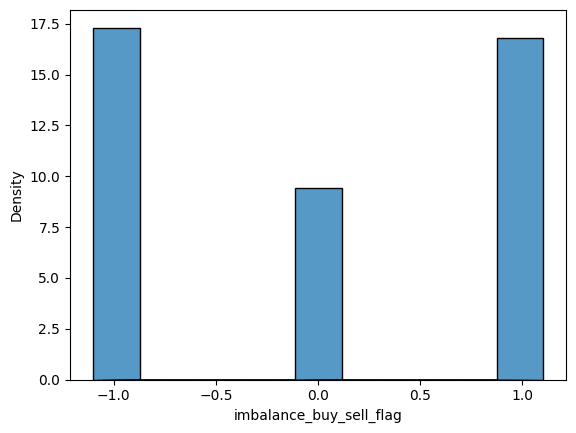

In [35]:
sns.histplot(x=train_dataset.imbalance_buy_sell_flag, shrink=10, stat='density')

Weighted Average Price
- higher than 1, it indicates that there was strong buying interest during the day.
- lower than 1, it suggests selling pressure.

<Axes: xlabel='date_id', ylabel='wap'>

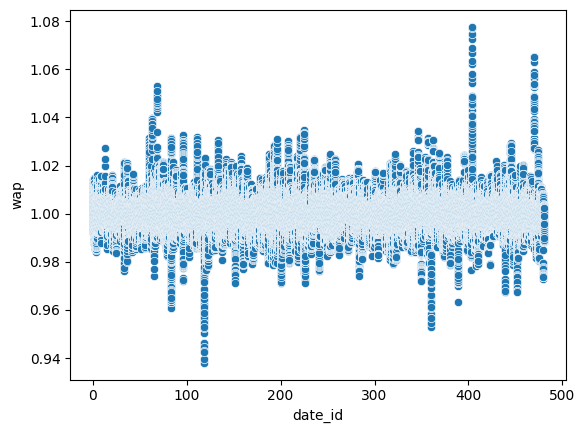

In [36]:
sns.scatterplot(x=train_dataset.date_id, y=train_dataset.wap)

<Axes: xlabel='wap', ylabel='target'>

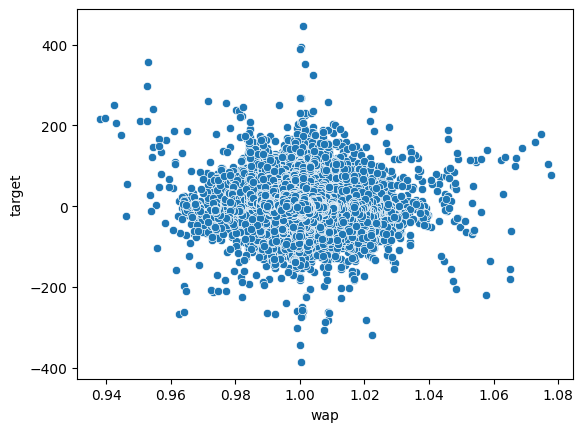

In [37]:
sns.scatterplot(x=train_dataset.wap, y=train_dataset.target)

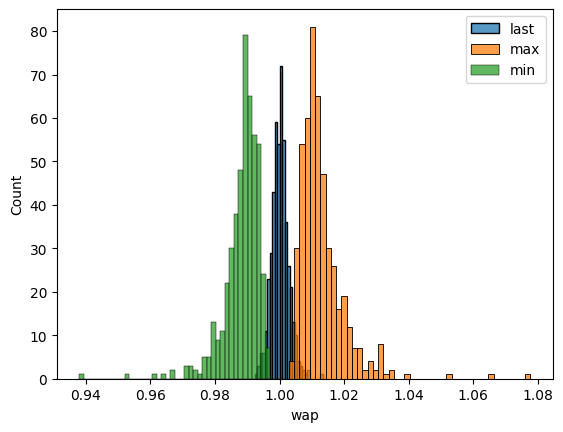

In [38]:
# sns.histplot(x=train_dataset.groupby('date_id').first().near_price)
sns.histplot(x=train_dataset.groupby('date_id').last().wap, label='last')
sns.histplot(x=train_dataset.groupby('date_id').wap.max(), label='max')
sns.histplot(x=train_dataset.groupby('date_id').wap.min(), label='min')
plt.legend()

In [ ]:
train_dataset[['target']].describe()

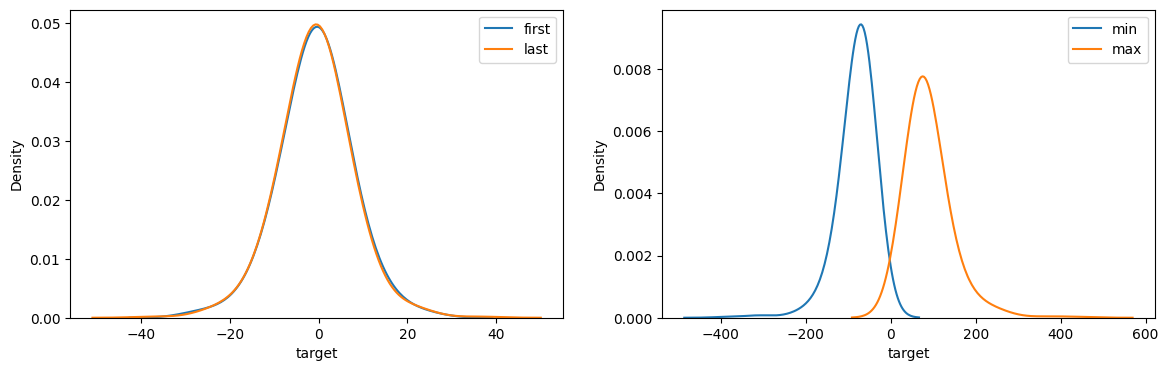

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('date_id').target.first(), bw_adjust=2, label='first')
sns.kdeplot(x=train_dataset.groupby('date_id').target.last(), bw_adjust=2, label='last')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('date_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('date_id').target.max(), bw_adjust=3, label='max')
plt.legend()

<Axes: xlabel='target', ylabel='Density'>

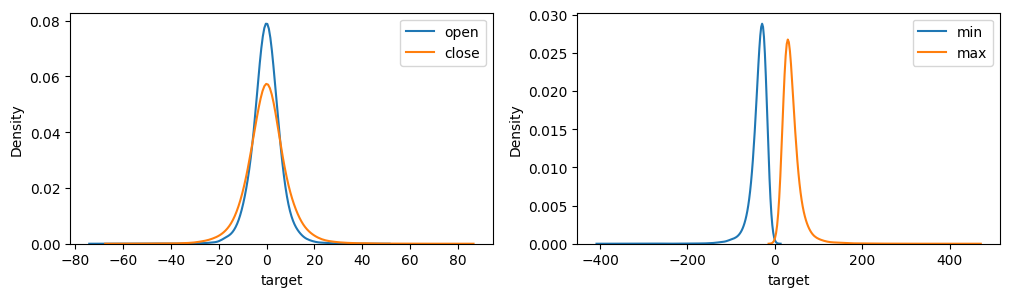

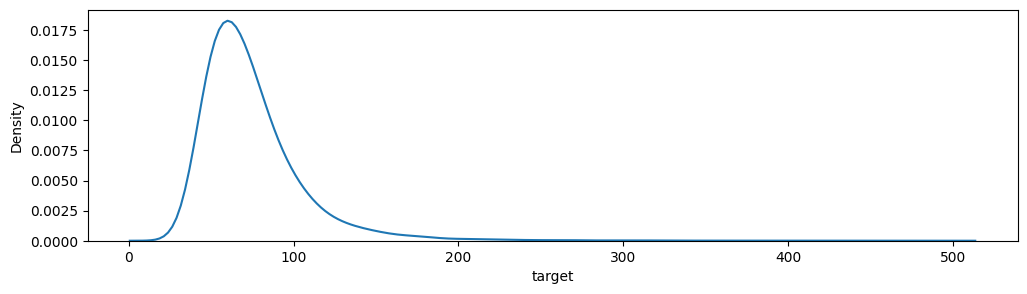

In [40]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('time_id').target.first(), bw_adjust=2, label='open')
sns.kdeplot(x=train_dataset.groupby('time_id').target.last(), bw_adjust=2, label='close')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('time_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('time_id').target.max(), bw_adjust=3, label='max')
plt.legend()
plt.figure(figsize=(12,3))
sns.kdeplot(x=train_dataset.groupby('time_id').target.max() - train_dataset.groupby('time_id').target.min(), bw_adjust=2, label='max - min')

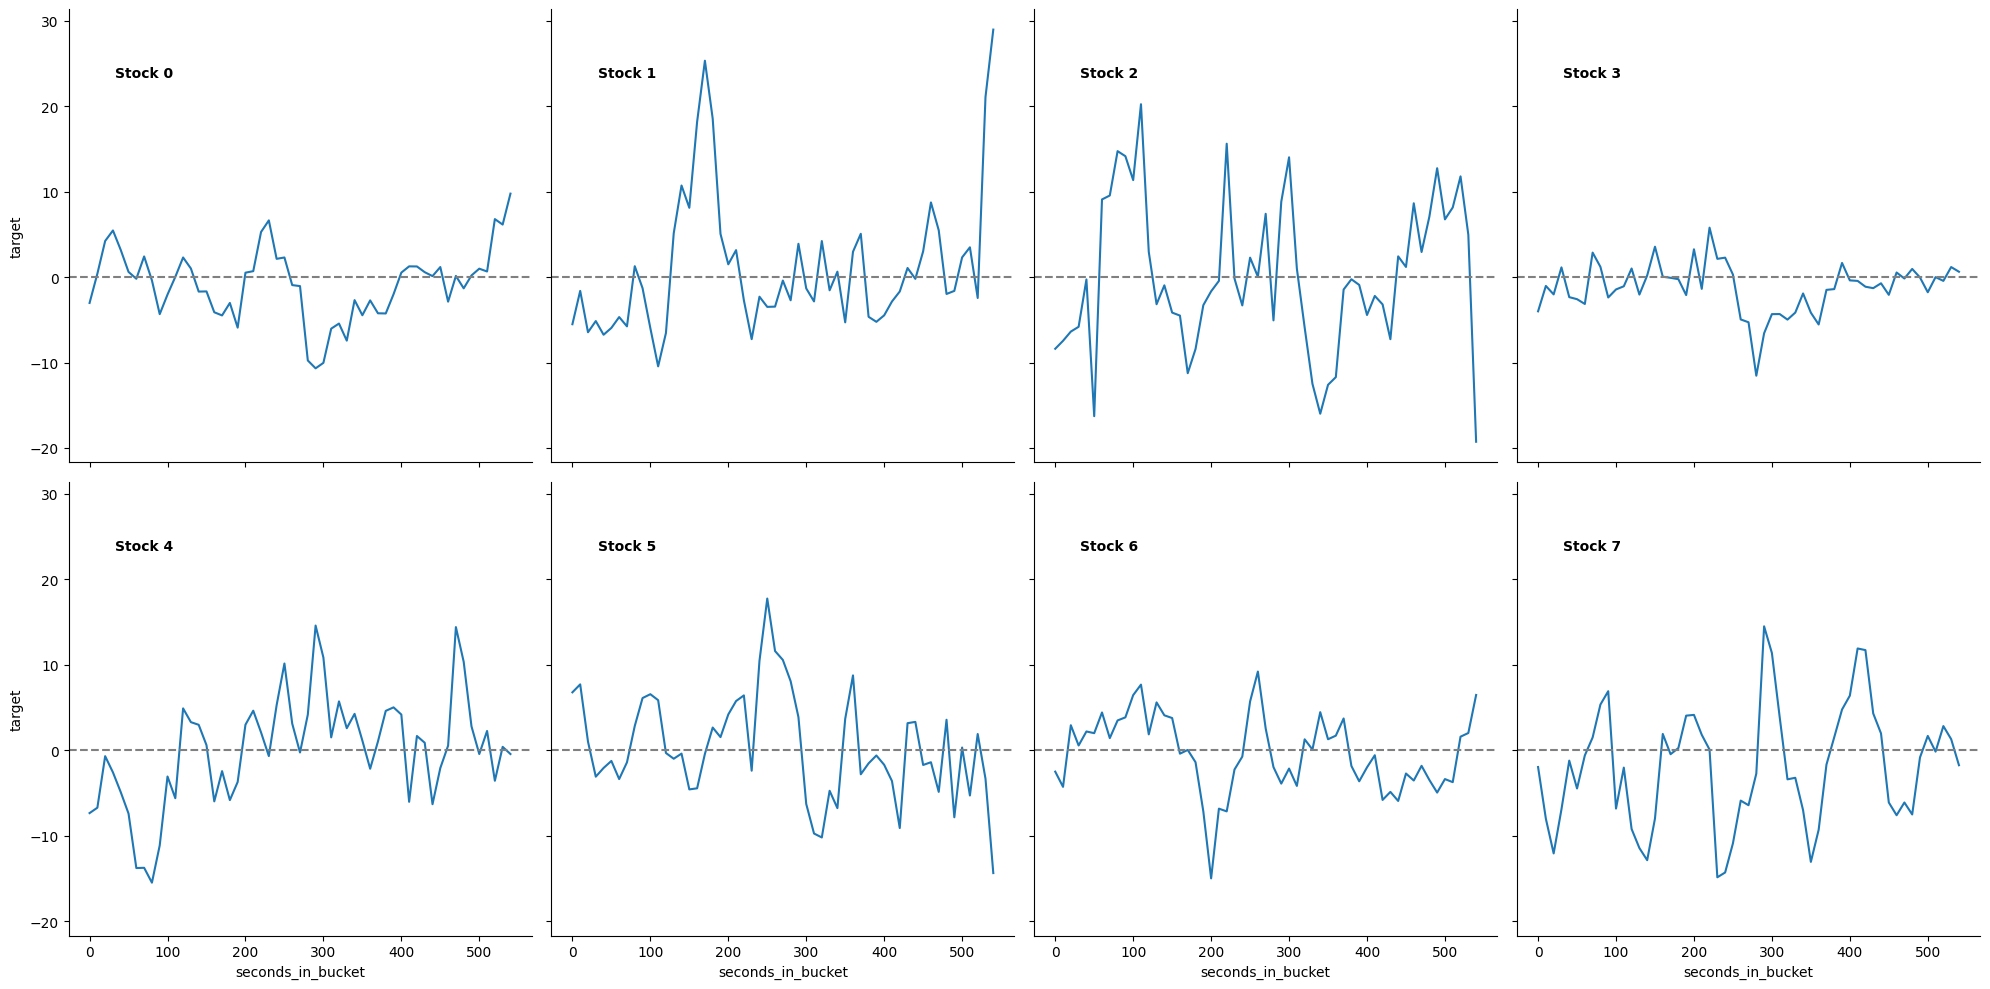

In [41]:
g = sns.relplot(
    data=train_dataset.query("date_id == 0 & stock_id < 8"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="stock_id",
    col_wrap=4
)
for stock_id, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.1, .85, f"Stock {stock_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.refline(y=0)
g.tight_layout()
plt.show()

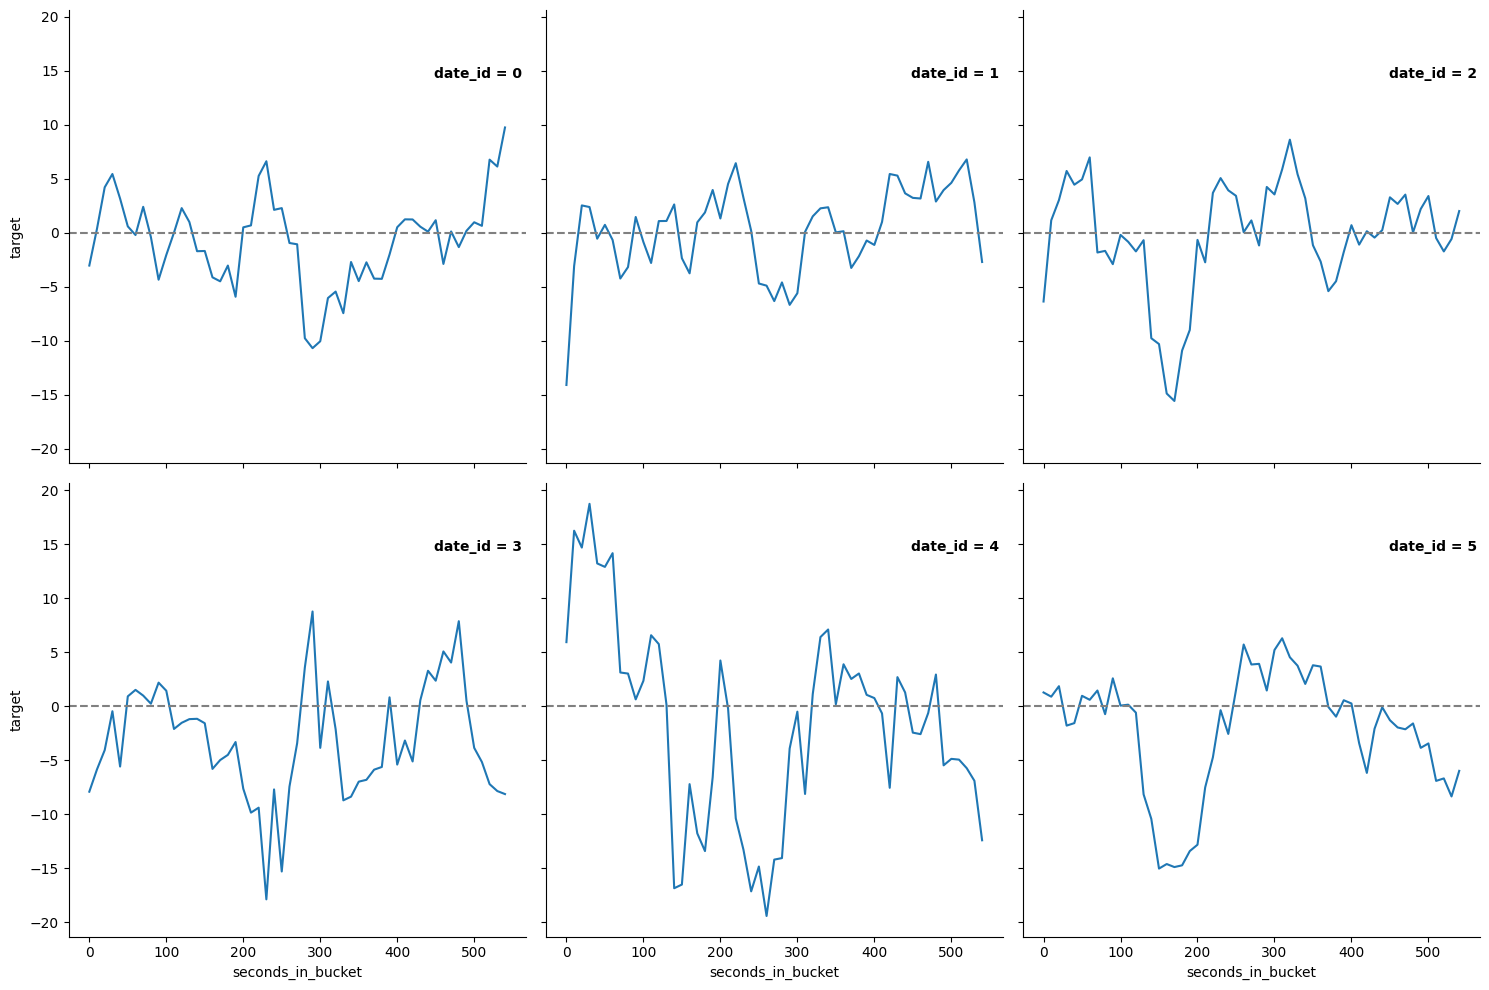

In [42]:
g = sns.relplot(
    data=train_dataset.query("stock_id == 0 & date_id < 6"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

# Feature Selection

Create volume and ratio

In [42]:

train_dataset['volume'] = train_dataset['ask_size'] + train_dataset['bid_size']

train_dataset['ask_ref_ratio'] = train_dataset['ask_price']/train_dataset['reference_price']
train_dataset['bid_ref_ratio'] = train_dataset['bid_price']/train_dataset['reference_price']

train_dataset['ask_imb_ratio'] = train_dataset['ask_size']/train_dataset['imbalance_size']
train_dataset['bid_imb_ratio'] = train_dataset['bid_size']/train_dataset['imbalance_size']

train_dataset['ask_mat_ratio'] = train_dataset['ask_size']/train_dataset['matched_size']
train_dataset['bid_mat_ratio'] = train_dataset['bid_size']/train_dataset['matched_size']